<a href="https://colab.research.google.com/github/gyeongee/TIL/blob/main/ex05_Yolo_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이미지의 특징을 뽑아내는 것도 딥러닝이 해라!!
- 객체의 위치

# 객체 탐지

## 개요

- 참고 : https://pseudo-lab.github.io/Tutorial-Book/chapters/object-detection/Ch1-Object-Detection.html
- https://leedakyeong.tistory.com/entry/Object-Detection%EC%9D%B4%EB%9E%80-Object-Detection-%EC%9A%A9%EC%96%B4%EC%A0%95%EB%A6%AC


- 객체 탐지(object detection) : 컴퓨터 비전과 이미지 처리와 관련된 컴퓨터 기술로서, 디지털 이미지와 비디오에서 관심 객체(예: 인간, 건물, 자동차 등)의 위치를 감지하는 작업
  - 활용 분야 : 얼굴 검출, 보행자 검출, 영상 복구, 비디오 감시, 자율주행 등
  
<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_object_detect.PNG" width=30%> </center>
  
- 객체 분류 : 탐지된 객체가 무엇인지 판단하고 분류하는 작업

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_object_detect2.png" width=30%> </center>

- 객체 탐지 및 분류 알고리즘 (참고 : 위키백과)
  - 머신러닝 기반 접근 : 아래 알고리즘을 사용하여 정의하고 SVM 등을 이용하여 분류
    - Haar features 기반 비올라–존스 객체탐지 프레임워크
    - Scale-invariant feature transform (SIFT)
    - Histogram of oriented gradients (HOG) 기능
  - 딥러닝 기반 접근 : 구체적 정의가 필요 없고, 일반적으로 합성곱 신경망(CNN)을 활용
    - Region Proposals(후보 영역 추출) (R-CNN, Fast R-CNN, Faster R-CNN, cascade R-CNN)
    - Single Shot MultiBox Detector (SSD)
    - You Only Look Once (YOLO)
    - Single-Shot Refinement Neural Network for Object Detection (RefineDet)
    - Retina-Net
    - Deformable convolutional networks
    
  
<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_object_detect3.png" width=60%> </center>
<center><font size=1>참고 : Zou et al. 2019. Object Detection in 20 Years: A Survey</font></center>    


- Two-Stage Detector
  - Classification(분류 + 박스보정), Regional Proposal을 순차적으로 수행하여 결과를 얻는 방법
  - 객체를 검출하는 정확도 측면에서는 좋은 성능을 냈지만, 예측 속도가 느려 실시간 탐지에 제한
  - R-CNN, Fast R-CNN, Faster R-CNN 등

- One-Stage Detector :
  - Classification, Regional Proposal을 동시에 수행하여 결과를 얻는 방법    
  - Two-Stage Detector의 속도 문제를 해결하기 위해 제안
  - YOLO, SSD, RetinaNet 등
  
<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_object_detect4.png" width=60%> </center>
<center><font size=1>참고 : Naver BoostCamp AI Tech - edwith 강의</font></center>  

### Region Proposal(후보 영역 제안)
- 입력 이미지에서 " 어디에 물체가 있을 것 같은지" 후보 영역을 찾아냄
- 관심영역(ROI)을 뽑아내는 과정
- R-CNN : 수천 개의 후보 박스 생성
- Faster R-CNN : CNN 특징 맵에서 바로 후보 박스 추출
- 이 단계에서는 무슨 물체인지 모름
- 위치(좌표)만 줌

### Classification(분류 + 박스 보정)
- Region Proposal에서 얻는 후보 박스를 잘라내서 무슨 물체인지(class)판별
- 후보 박스의 위치와 크기를 조금 더 정확히 보정(bounding box regression) 함
- 각 박스마다 "클래스 라벨 + 정확한 좌표"가 출력

Two-stage detector: 후보 영역 → 분류 (정확도↑, 속도↓)

One-stage detector(YOLO, SSD 등): 후보 영역 없이 바로 클래스 + 위치를 동시에 예측 (속도↑, 정확도↓)

#### Localization을 위한 region proposal

##### Sliding Window

- window의 크기를 다양하게 만듦
- window 크기는 그대로, 이미지를 작게 만듦 -> 비효율적임

haar-casescade

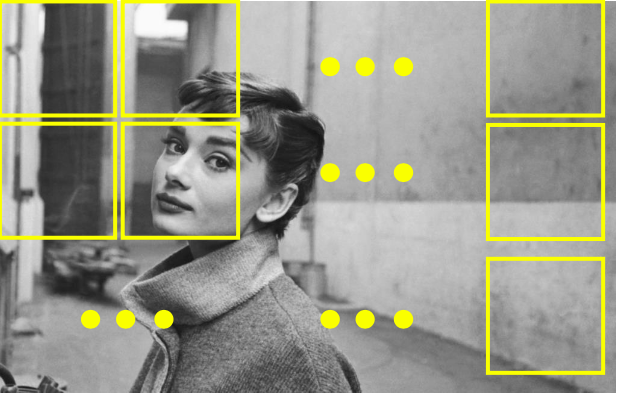

##### Selective Search

- 픽셀들끼리 유사도 계산하여 그룹핑

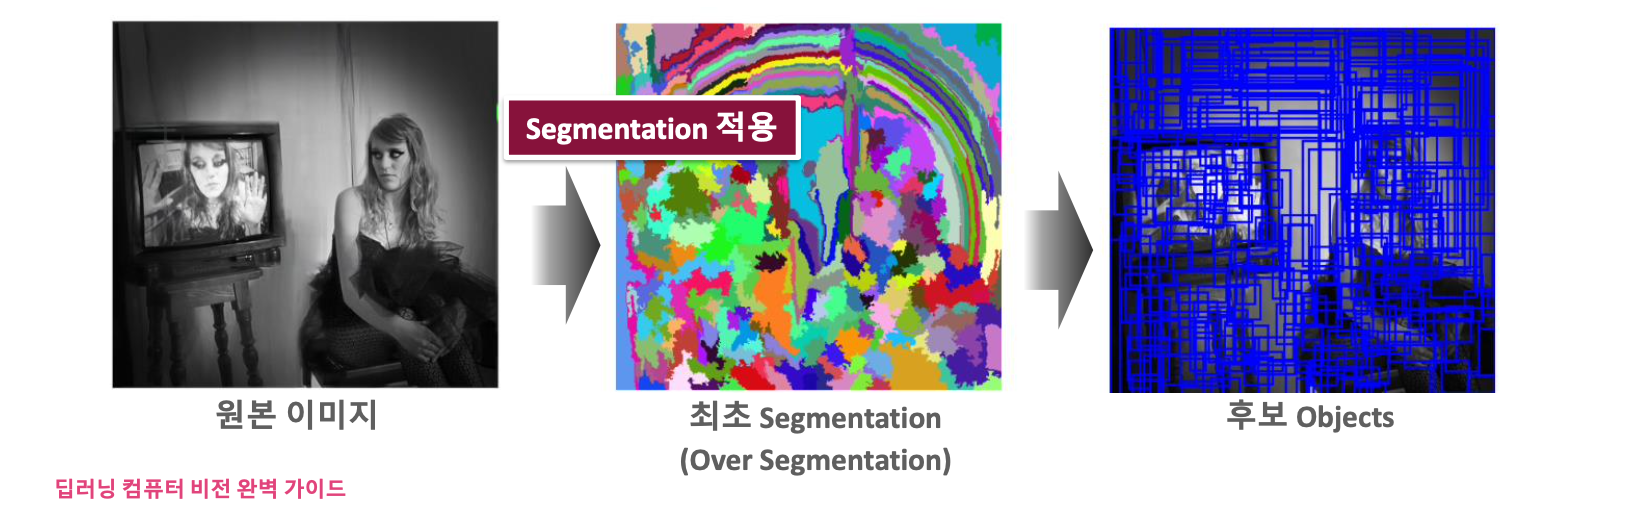

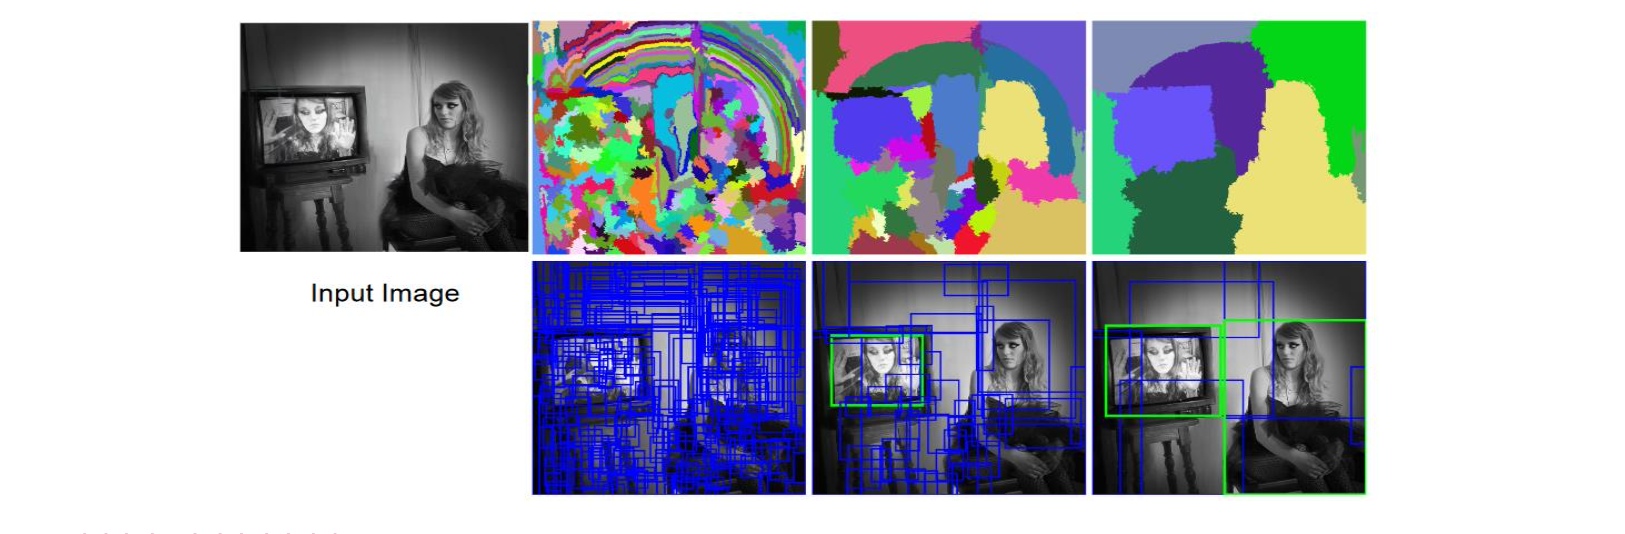

## 바운딩 박스 (Bounding Box)

- 객체 탐지 모델에서 바운딩 박스는 <font color=orange>타겟 위치</font>를 특정하기 위해 사용
  - 타겟 위치를 X와 Y축을 이용하여 사각형으로 표현
  - 예를 들어, 바운딩 박스 값은 (X 최소값, Y 최소값, X 최대값, Y 최대값)으로 표현
  
<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_bounding_box.PNG" width=40%> </center>
<center><font size=1>참고 : https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection</font></center>
  

- 일반적으로 효율성을 높이기 위해 바운딩 박스의 위치를 0-1값으로 정규화

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_bounding_box1.PNG" width=40%> </center>
<center><font size=1>참고 : https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection/raw/master/img/bc2.PNG</font></center>

- 객체 탐지 모델에 사용되는 데이터의 크기가 크기 때문에 바운딩 박스를 사용하여 객체의 위치를 설정하여 탐지하고 딥러닝 과정에서 바운딩 박스 영역만 활용
 - <font color=orange>객체 탐지 모델은 이미지 전체를 다 쓰는게 아니라 바운딩 박스로 표시된 부분을 중심으로 학습함</font>

- backbone

## Yolo (You only Look Once : 한 번보고 처리한다)

- 참고
  - https://blog.nerdfactory.ai/2021/05/06/You-Only-Look-Once.-YOLO.html

- 대표적인 객체 탐지 모델
- 하나의 컨볼루션 네트워크를 통해 대상의 위치(바운딩박스)와 클래스(분류)를 한번에 예측 (1 state dectection 알고리즘)
  
  - 이미지를 S x S 그리드로 분할 (초기 논문 S = 7)
  - 이미지 전체를 신경망에 넣고 특징 추출을 통해 예측 텐서(그리드별 바운딩박스 정보, 신뢰점수, 분류 클래스 확률)를 생성
  - 그리드별 예측 정보를 기반으로 바운딩박스 조정 및 분류 작업 수행
  - 각 그리드 셀은 B 개의 바운딩박스와 바운딩박스에대한 신뢰점수를 가짐
  - 각 그리드 셀은 C 개의 분류 클래스 확률을 가짐
  - 각 바운딩박스는 왼쪽상단 좌표 (x, y)와 폭과 높이 (w, h), 신뢰점수를 가짐

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo01.png" width=50%> </center>


각 셀에서
- B개의 바운딩 박스 : (x, y, w, h) 좌표,
- confidence (이 박스 안에 객체가 있을 확률 × 박스가 GT와 얼마나 잘 겹치는지)
 - Ground Truth (GT) = “실제 정답”, 사람이 직접 라벨링한 바운딩 박스와 클래스 정보
- confidence = Pr(object) × IoU(predicted box, GT box)
- Pr(object): 박스 안에 객체가 있을 확률

- IoU(pred, GT): 모델이 예측한 박스(pred)와 실제 정답(GT)이 얼마나 겹치는지 (0~1)
### YOLO 모델은 지도학습 모델이라서 학습 데이터(이미지 + 정답라벨(바운딩박스 + 클래스) 쌍이 있어야 학습 가능

- 끝 부분이 컨볼루션레이어 -> 예측값을 컨볼루션 레이어도 뽑아냄
 - CNN(backbone) → feature map 생성
 - 마지막 컨볼루션 레이어에서 바로 바운딩 박스 좌표, confidence, 클래스 확률을 예측

- 하나의 박스(구역) 내에서 하나의 개체만 추론
 - YOLOv1 논문 기준으로는 <font color=orange>그리드 셀 안의 객체 중 가장 큰 바운딩 박스(면적이 큰 객체)를 선택</font>

 - 이유: 작은 객체보다 큰 객체가 셀 안의 영역을 더 많이 차지 → 학습 안정성 확보


3️⃣ 해결 방법 (후속 YOLO 버전)

- Anchor Box 도입(YOLOv2~)

   한 셀 안에서도 여러 박스를 예측할 수 있어 여러 객체 처리 가능

- Multi-scale Feature Map

   큰/작은 객체를 다른 스케일의 특성 맵에서 처리

   YOLOv3 이상에서는 한 셀에서 여러 객체 대응이 가능해짐

- 여러 컨볼루션 레이어(이미지 특징 추출, 이미지의 위치 정보를 그대로 유지하면서 특징을 추출)를 거쳐 하나의 특징 맵이 생성됨
- 이 특징 맵에는 이미지 전체의 공간 정보와 패턴 정보가 담겨있음
- 마지막 컨볼루션 레이어에서 한 번에 모든 그리드 셀의 바운딩 박스와 클래스 확률을 예측


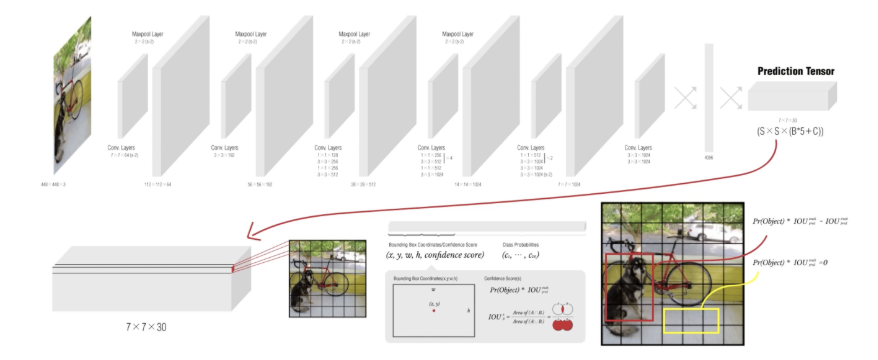

후처리

- Confidence 계산

- NMS(중복 박스 제거)

- 최종 검출 결과 확정

- 첫 번째 5개는 첫번 째 box에 대한 정보(객체의 위치, 객체 확률)
- 두 번째 5개는 두 번쨰 box에 대한 정보(객체의 위치, 객체 확률)
- 20개는 class 정보

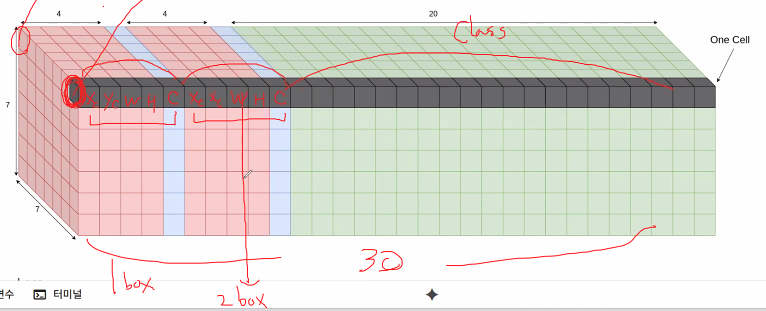

- 좌표 공간, 너비 높이 loss 값  
-  `+` 객체가 있는 부분, 객체가 없는 부분에 대한 loss 값
- `+` 클래스에 대한 loss 값

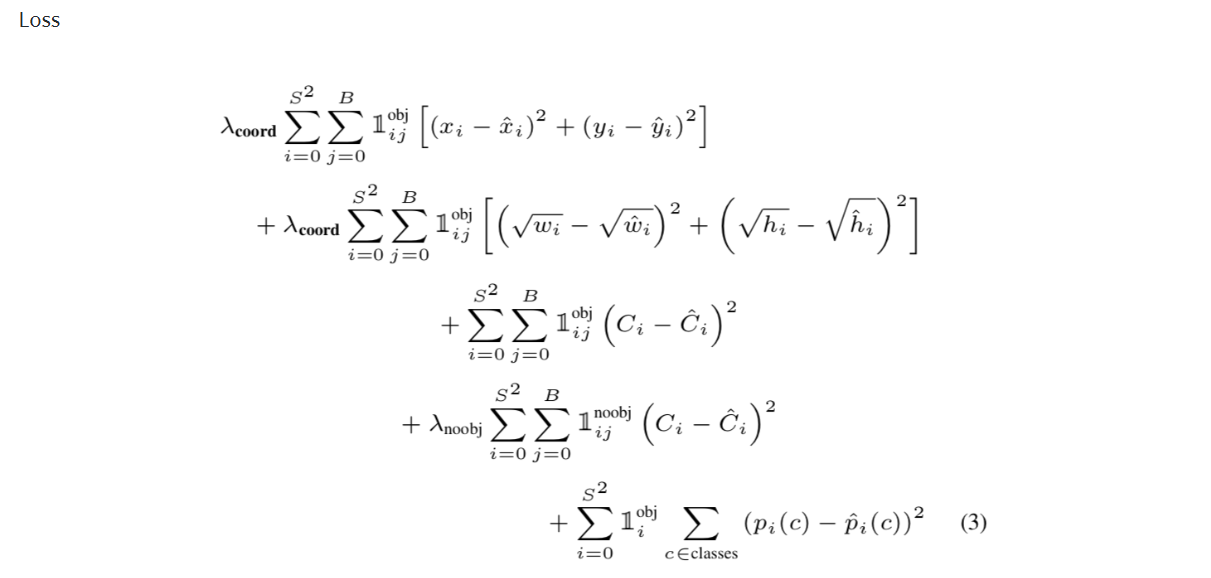

### YoloV1
- Josept Redmon이 2015년에 yolov1 논문을 발표하고 공개
- <font color=orange>convolutional layer로 이미지로부터 특징을 추출하고, FC layer로 바운딩박스와 class 확률을 예측</font>
- 24개의 convolutional layer와 2개의 fully connected layer로 구성
- GoogLeNet에서 영향을 받아 1x1 차원 감소 layer (Inception) 뒤에 3x3 convolutional layer를 이용


- Image → CNN → FC → PT(Prediction Tensor) 순서로 동작

- 2️⃣ 마지막 층과 prediction tensor

  마지막 컨볼루션 레이어의 출력이 바로 prediction tensor예요.

  예를 들어 YOLOv1:

  출력 shape: [S, S, B*5 + C]


    S×S: 그리드 셀

    B*5: 각 박스 좌표 + confidence

    C: 클래스 확률

  즉, CNN의 마지막 층의 출력 = prediction tensor = 모든 그리드 셀의 예측값

- 네트워크 구조
  - VGG16 모델을 기반으로 224x224 크기의 해상도로 학습을 하고, 448x448 크기의 이미지에 대해서 Object Detection을 수행하도록 설계

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo03.png" width=50%> </center>

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo03_02.png" width=50%> </center>

- 단점
  - 여러 물체들이 겹쳐있으면 제대로 된 예측이 어려움
  - 물체가 작을 수록 정확도가 감소
  - 바운딩박스 형태가 data를 통해 학습되므로 새로운 형태의 바운딩박스의 경우 정확히 예측하지 못함   

### YoloV2

- YOLOv1 모델의 문제점을 보완하여 정확도를 높인 모델
- 특징
  - CNN에 Batch Normalization 적용 - 2% 향상
  - 학습 전 이미지 분류 모델을 큰 해상도의 이미지에 대해 fine-tuning 단계를 거쳐 고해상도 이미지로 CNN 신경망을 학습 - 4% 향상
  - <font color = orange>Anchor Box</font>의 개념 도입
  : 사전에 정의해 둔 다양한 크기와 비율의 바운딩 박스
    - 마지막 단의 Fully Connected layer을 떼어내고 Convolutional Network 형태로 prediction을 계산
    - 바운딩 박스의 좌표를 예측하기 보다는 사전에 정의한 앵커 박스에서 offset을 예측
    - Anchor Box의 핵심 : 사전에 크기와 비율이 모두 결정되어 있는 박스를 전제로, 학습을 통해서 이 박스의 위치나 크기를 세부 조정하는 것
    - 최근의  YOLO 모델들은 Anchor free model

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo04.png" width=40%> </center>

  - features map 크기를 7x7 에서 13x13으로 변경
  
  - Multi-Scale Training : 작은 물체도 추출하기 위해 여러 스케일의 이미지를 학습 (일정반복마다 입력이미지의 해상도를 변경)
  
- 네트워크 구조
  - Darknet 19 신경망을 구축하여 이용
  - VGG-16 신경망에서 대부분의 가중치가 쓰인 FC layer를 제거하여 가중치 파라미터 수를 낮춰줬기 때문에 속도가 향상

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo05.png" width=60%> </center>

1. 앵커 박스(Anchor Box)

YOLO 같은 객체 탐지 모델에서 사전에 정의해 둔 다양한 크기와 비율의 바운딩 박스

각 그리드 셀마다 여러 개의 앵커 박스를 놓고, 실제 객체와 얼마나 맞는지 비교

예시:

작은 물체 → 작은 앵커 박스

큰 물체 → 큰 앵커 박스

세로로 긴 물체 → 세로형 앵커 박스

2. Offset

앵커 박스는 사전 정의된 박스이므로 실제 객체와 완전히 일치하지 않을 수 있음

따라서 모델은 **"사전에 정해진 앵커 박스를 기준으로 얼마나 이동하고 크기를 조정해야 하는지"**를 예측함

이 이동/조정 값이 바로 offset

수식 예시

앵커 박스 중심 좌표:
(
𝑥
𝑎
,
𝑦
𝑎
)
(x
a
	​

,y
a
	​

)

실제 객체 중심 좌표:
(
𝑥
,
𝑦
)
(x,y)

모델이 예측하는 offset:
Δ
𝑥
=
𝑥
−
𝑥
𝑎
Δx=x−x
a
	​

,
Δ
𝑦
=
𝑦
−
𝑦
𝑎
Δy=y−y
a
	​


width/height도
Δ
𝑤
,
Δ
ℎ
Δw,Δh로 조정

즉, offset = 앵커 박스 대비 실제 객체의 위치와 크기 차이

즉, offset = 앵커 박스 대비 실제 객체의 위치와 크기 차이

### YoloV3

- Josept Redmon이 2018년 4월 제안

- shortcut connection: 특정 층(layer)의 출력을 다음 층(layer) 출력에 바로 더해주는 연결
- <font color=orange>shortcut connection</font>이 추가되어 53개의 layer를 가지는 Darknet-53을 backbone network로 사용
- Darkenet-53은 ResNet-101보다 1.5배 빠르며, ResNet-152와 비슷한 성능을 보이지만 2배 이상 빠름

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo06.png" width=70%> </center>

#### FPN
- back bone(특징추출)
- neck : 특성부분 정보 업데이트(저수준의 피처 -> 고수준의 피처(요약된 정보))
- head(추론)

- 일반적인 SSD와 같은 구조는, feature extractwor의 앞쪽에서 나온 feature map은 표현력이 부족
- 이를 보완하기 위해 우측처럼 다시 deconvolution으로 feature map의 크기를 확장시켜 high-level feature를 뽑도록 함
- 왼쪽과 오른쪽의 feature map을 concat해서(왼쪽에서 위치정보 등을 갖고오는 식으로) 표현력을 향상시켜 사용함

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo07.png" width=70%> </center>

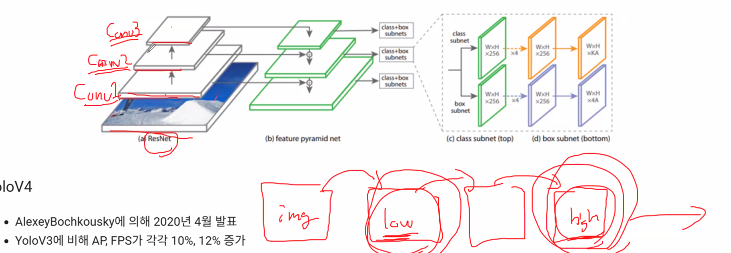

1️⃣ Shortcut Connection


In [ ]:
입력 X → [Conv Layer + BatchNorm + ReLU] → F(X)
           ↘
             +  (X)
             ↓
           출력 Y = F(X) + X


여기서 F(X)는 convolution 등을 거친 변환

X는 이전 층 입력

Y = F(X) + X가 최종 출력

1️⃣ Backbone – <font color=orange>특징 추출</fpnt>

역할: 이미지에서 기본적인 특징(feature)을 추출

일반적으로 CNN 모델(ResNet, Darknet 등)을 사용

층이 깊어질수록 feature map의 크기는 줄어들지만 정보는 고수준(high-level) 특징으로 추상화됨

반대로 초기 층에서는 저수준(low-level) 특징(에지, 색, 질감 등)을 갖음

💡 정리: backbone = 이미지에서 특징을 뽑는 CNN

2️⃣ Neck – <font color=orange>feature 강화 및 통합</font>

역할: backbone에서 뽑은 feature map들을 조합하고 강화

대표적인 구조: FPN(Feature Pyramid Network)

FPN의 핵심 아이디어

Bottom-up pathway:

일반 CNN처럼 점점 feature map 크기가 줄어들면서 high-level feature 생성

Top-down pathway + lateral connection:

작은 feature map(high-level) → upsampling(deconvolution 등) → 큰 feature map(low-level) 크기와 맞춤

lateral connection: 같은 크기의 feature map끼리 concat 또는 element-wise addition

low-level feature에서 위치 정보(spatial information)를 가져옴

high-level feature에서 추상적 의미(context)를 가져옴

결과:

여러 크기의 feature map이 만들어져, 작은 객체와 큰 객체 모두 탐지 가능

low-level feature → 위치 정보 좋음

high-level feature → 의미 정보 좋음

💡 쉽게 말하면:

“큰 feature는 의미를 많이 알고, 작은 feature는 위치를 많이 알고 있음. 둘을 합쳐서 더 좋은 feature map 만들자”

3️⃣ Head – 최종 추론

역할: neck에서 나온 feature map으로 실제 바운딩 박스 좌표 + 클래스 확률 예측

YOLO, SSD, Faster R-CNN 등에서 head가 존재

FPN과 같은 neck에서 강화된 feature map을 사용하면 정확도가 높아짐

4️⃣ SSD 대비 FPN 차이

기존 SSD:

feature extractor의 앞쪽(layer)의 feature map은 low-level → 위치 정보만 있음, 표현력 부족

작은 객체 탐지 성능 제한

FPN:

top-down pathway + lateral connection → low-level과 high-level feature를 결합

작은 객체도 잘 잡고, 큰 객체도 잘 잡음

### YoloV4

- AlexeyBochkousky에 의해 2020년 4월 발표
- YoloV3에 비해 AP, FPS가 각각 10%, 12% 증가
- CSPNet 기반의 backbone(CSPDarkNet53)을 설계하여 사용
- 다양한 기법을 적용항 성능 향상 : WRC (Weighted-Residual-Connections), CSP (Cross-Stage-Partial-Connections), CmBN (Cross mini-Batch Normalizations), SAT (Self-Adversarial-Training), Mish Activation, Mosaic Data Agumentation, Drop Block Regularization, CIOU Loss

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo08.png" width=50%> </center>

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo09.png" width=50%> </center>

### YoloV5


- GlennJocher에 의해 2020년 6월 발표
- YoloV4에 비해 낮은 용량과 빠른 속도, 성능은 비슷 (FPS : 140, mAP : 89.5)
- YoloV4와 같은 CSPNet 기반의 backbone을 설계하여 사용
- Darknet이 아닌 PyTorch 구현이기 때문에, 이전 버전들과 다름

- 다른 yolo 모델들과 달리 크기별로 구분 : Yolov5s, Yolov5m, YOlov5l, Yolov5x 등/

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo10.png" width=40%> </center>

### YoloV7

- Chien-Yao Wang에 의해 2022년 7월 발표
- E-ELAN 네트워크를 사용

- YOLO 제품군의 새로운 물체 탐지기로 현재까지 가장 빠르고 정확한 실시간 물체 탐지기
  
- 달라진 점
  - 아키텍처 개선
  - 훈련가능한 BoF (Bag of Freebies)
  - 인간 포즈 추정 모델을 포함하는 첫번째 YOLO 모델  
  
  - bag-of-freebies 방법을 사용한 성능 향상
     - model reparameterization : 훈련시 여러 개의 레이어 (Conv, BN)들을 학습하고 추론 시에는 해당 레이어들을 하나의 레이어로 합침 (RepVGG를 수정한 형태)
     - Label assignment : 모델의 에측, ground truth (예측되기를 원하는 라벨)의 분포를 고려해서 새로운 soft label를 만듬 (ATSS, OTA, SimOTA 방법)

  - 파라미터와 계산을 고려한 model scaling 방법 사용

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo11.png" width=70%> </center>

### YoloV6

- 2022년 9월 발표된 버전
- 여러 방법을 이용하여 알고리즘의 효율을 높이고, 특히 시스템에 탑재하기 위한 Quantization과 distillation 방식도 일부 도입하여 성능 향상

- 백본은 EfficientRep Backbone이 사용
  - Neck 부분은 Rep-PAN이 사용
  - head는 Efficient decoupled head가 사용

- CSPstackRep Block = CSP(cross stage partial) + RepVGG 방식이 backbone에 사용

- 소형 모델은 일반 단일 경로 백본을 특징으로 하고 대형 모델은 효율적인 다중 분기 블록을 기반으로 구축

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo12.png" width=70%> </center>

### YoloV8

- 2023년 1월 발표된 버전
- YOLO 모델을 위한 완전히 새로운 리포지토리를 출시하여 개체 감지
- 인스턴스 세분화 및 이미지 분류 모델을 train하기 위한 통합 프레임워크로 구축됨

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolo13.png" width=70%> </center>

### Data annotation 기법 <font size=2>(참고 : https://blog.naver.com/datahive/222224206050)</font>

- <font color=oragne>메타데이터를 데이터 셋에 추가하는 작업</font>
  - 인공지능이  데이터의 내용을 이해할 수 있도록 <font color=orange>주석을 달아주는 작업</font>
  
- bounding box : 이미지 혹은 영상 안 객체의 가장자리에 딱 맞춘 사각형 틀을 그려주는 것
  - 자율주행 차량이 실제 시나리오에서 주변 환경과 모든 물체를 인식하고 이해하도록 훈련하는데 활용
  - 장점 : 쉽고 빠르게 데이터를 가공
  - 단점 : 객체의 유형과 위치에 따라 바운딩 박스 안에 해당 객체에 속하지 않는 픽셀이 포함될 수 있음
  - 난이도 : ★★

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/106_bounding_box.png" width=50%> </center>  


- polygon : 길 위에 있는 보행자나 자전거같이 규칙적이지 않은 형태의 객체를 다각형 형태로 영역을 지정
  - 훨씬 정확하게 객체에 속한 픽셀을 어노테이션 할 수 있는 기법
  - 작업 속도가 약간 느림
  - 장점 : 객체의 윤곽을 정밀하게 선택할 수 있어, 인공지능에게 그 물체의 크기와 형태를 정확하게 인식시킬 수 있음
  - 단점 : 겹쳐져 있는 객체에 폴리곤 기법을 적용하는 경우엔 목표물을 정확히 인식하기 어려움
  - 난이도 : ★★

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/106_polygon.png" width=50%> </center>    

- polyline : 객체 테두리에 여러 점을 찍어 선으로 구성되어 나타내는 기법
  - 동일한 장소에서 시작하고 종료할 필요가 없는 형태를 추적해야 할 때 유용
  - 자율 주행 자동차의 차선 탐지 훈련, 물류창고의 컨베이어 벨트 탐지 훈련 등에 활용
  - 장점 : 전선 감지, 차선 감지 등 직선 혹은 곡선을 추적해야 하는 사례에 매우 유용
  - 단점 : 이미지 상 객체의 선이 1픽셀 너비에 가까운 경우에만 작동하기 때문에 객체의 선 너비가 넓은 경우엔 폴리곤 기법으로 대체
  - 난이도 : ★★

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/106_polyline.PNG" width=50%> </center>      

- point : 이미지 속 객체의 개수를 계산하거나 군중 속에 있는 사람을 선택하는 등 이미지 상 단일 픽셀을 찾아내는 경우에 매우 유용
  - 장점 : 작업 방법이 매우 쉽고 간단하며 그림판 같은 매우 간단한 툴을 이용 가능
  - 단점 : 객체의 윤곽이 명확하지 않은 이미지에는 적용하기 어려움
  - 난이도 : ★★

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/106_point.PNG" width=50%> </center>    

- cuboid : 바운딩 박스와 굉장히 비슷한 방식의 기법으로 3D 형태
  - 길이, 너비뿐만 아니라 폭까지 표시할 수 있어 2D 이미지만으로는 부족한 정밀도를 높일 수 있음
  - 산업로봇과 같은 기계가 물체를 더욱 정확하게 인식할 수 있게 하는 경우에 흔히 사용
  - 장점 : 객체의 깊이에 대한 정보가 제공되기 때문에 3D 환경에서 중요한 정보들을 식별
  - 단점 : 객체가 불규칙한 형태를 가지거나 가려진 부분이 있는 경우, 잘린 부분이 있는 경우엔 작업이 어려움
  - 난이도 : ★★★★

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/106_cuboid.PNG" width=50%> </center>    

- semantic segmentation : 이미지에 있는 모든 픽셀을 채색하고 해당하는 클래스로 분류하는 방식
  - 자율 주행 자동차, 의료 영상 분석, 산업 검사, 위성 영상, 로봇 비전 등에 유용하게 활용
  - 이미지 속 모든 장면과 상황을 인식할 수 있게 가공하는 고차원의 방법
  - 장점 : 기계가 해당 장면을 왁벽히 이해시킬 수 있음
  - 단점 : 이미지의 모든 픽셀을 해당하는 클래스로 분류해야 하기 때문에 많은 작업이 필요
  - 난이도 : ★★★★

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/106_segmentation.PNG" width=30%> </center>    

#### 성능평가

- IoU (Intersection over union) : 예측된 바운딩 박스와 <font color=orange>사용자가 설정한 바운딩 박스간 중첩되는 부분의 면적을 측정</font>해서 중첩된 면접을 합집합의 면적으로 나눈 것

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_iou.jpg" width=40%></center>

- AP (Average Precision) : 컴퓨터 비전 분야에서 물체 검출 및 이미지 분류 알고리즘의 성능 평가 기준
  - AP는 precision-recall 그래프에서 그래프 선 아래쪽의 면적으로 계산
  - 보통 계산 전에 PR 곡선을 계단식으로 감소하는 그래프가 되게 하기 위해서 변환하고 넓이를 구함 (적색)
  - AP = 왼쪽 큰 사각형의 넓이 + 오른쪽 작은 사각형의 넓이 = 1*0.33 + 0.88*(0.47-0.33) = 0.4532
  
<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_ap.png" width=40%></center>

- mAP (Mean Average Precision) : 물체가 여러 개인 경우 각 클래스별로 AP를 구하고 합을 구한 후에 물체의 개수로 나눈 값

#### 훈련 결과

- mAP가 0.5IoU에서 0.738, 0.5:0.95IoU에서 0.411이 나옴

<center><img src="https://arome1004.cafe24.com/images/cv_project/lecture_image/105_yolov7_train_result.PNG" width=60%></center>